In [1]:
import pandas as pd
import numpy as np
import os
import random

from mlchartist.array_builder import build_arrays
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
min_len = 2000
num_samp = 1

filenames = []

for file in os.listdir(r'../raw_data/processed'):
    if file.endswith('.csv'):
        with open('../raw_data/processed/' + file) as f:
            rows_num = sum(1 for line in f)
            if rows_num >= min_len:
                filenames.append(file)
                    

In [3]:
if len(filenames) < num_samp:
    print('Sample size bigger that nuber of companies available')
else:
    sample = random.sample(filenames, num_samp)

In [4]:
sample

['kdp.csv']

In [5]:
dfs = []

for ticker in sample:
    ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
    dfs.append(ticker_df)

In [6]:
df = pd.concat(dfs)

In [7]:
#df = pd.read_csv('../raw_data/processed/aapl.csv')

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
#INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal']

In [10]:
df['5D_return_bin'] = (df['5TD_return'] >= FIVE_TR)
df['10D_return_bin'] = (df['10TD_return'] >= TEN_TR)
df['20D_return_bin'] = (df['20TD_return'] >= TWENTY_TR)

In [15]:
test_df = df[df['date'].dt.year >= 2018]
train_df = df[df['date'].dt.year < 2018]

In [16]:
scaler = RobustScaler()

In [17]:
scaler.fit(train_df[INPUT_COLS])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [18]:
train_df.loc[:, INPUT_COLS] = scaler.transform(train_df[INPUT_COLS])
test_df.loc[:, INPUT_COLS] = scaler.transform(test_df[INPUT_COLS])

/Users/Kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
train_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,KDP,2008-06-13,-0.603674,-0.434905,-0.675566,-1.717180,-0.405390,0.108954,-0.994881,-0.222274,...,-0.785361,-0.027296,-0.124607,-0.116913,1.384748,-0.488467,-0.605517,False,False,False
1,KDP,2008-06-16,-1.052695,-1.037068,-0.807461,-1.740192,-0.423247,0.153003,-0.974368,-0.442781,...,-0.791041,-0.004630,-0.115184,-0.114453,-2.827390,-1.646640,-0.537766,False,False,False
2,KDP,2008-06-17,-1.152498,-1.033399,-0.901208,-1.743703,-0.448415,0.105928,-0.932559,-0.525633,...,-0.808226,-0.039225,-0.121790,-0.103673,-0.805177,-1.907645,-0.828327,False,False,False
3,KDP,2008-06-18,-0.919646,-0.758499,-1.017466,-1.730867,-0.436401,0.111391,-0.923336,-0.450741,...,-0.824603,-0.052458,-0.103008,-0.142352,0.932172,-0.792393,-0.268322,False,False,False
4,KDP,2008-06-19,-0.848523,-0.700397,-0.896510,-1.713834,-0.421970,0.078046,-0.915820,-0.541867,...,-0.836546,-0.072033,-0.123441,-0.154327,0.241351,-0.482088,-1.587298,False,False,False
5,KDP,2008-06-20,-0.768423,-0.637056,-0.754116,-1.684918,-0.407045,0.055342,-0.901011,-0.648651,...,-0.841825,-0.100041,-0.111803,-0.143339,0.267058,-0.945753,-1.020668,False,False,False
6,KDP,2008-06-23,-0.969386,-0.867083,-0.793127,-1.700676,-0.417015,0.006312,-0.887260,-0.715994,...,-0.848536,-0.111068,-0.088967,-0.120336,-1.237987,-0.256487,-1.357577,False,False,False
7,KDP,2008-06-24,-1.401219,-1.022014,-0.908674,-1.721673,-0.447928,0.072771,-0.761487,-0.912459,...,-0.873567,-0.085936,-0.039435,-0.103218,-3.246031,-1.308473,-2.249674,False,False,False
8,KDP,2008-06-25,-1.401219,-0.972037,-1.029023,-1.725745,-0.433459,0.040168,-0.644699,-0.987244,...,-0.907403,-0.053348,-0.030684,-0.092893,-0.059065,-1.710883,-1.765683,False,False,False
9,KDP,2008-06-26,-1.534571,-1.119806,-1.119818,-1.747365,-0.452205,-0.001921,-0.521276,-1.047845,...,-0.950243,-0.055398,-0.023827,-0.084885,-1.231102,-2.306133,-1.975576,False,False,False


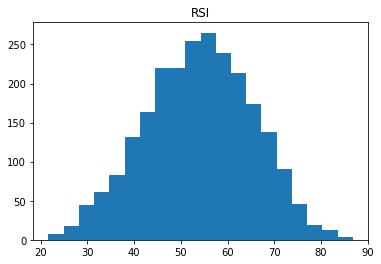

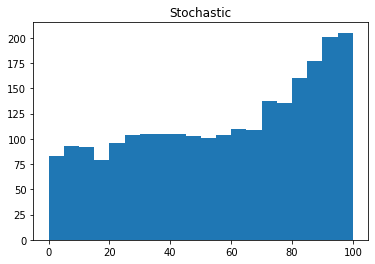

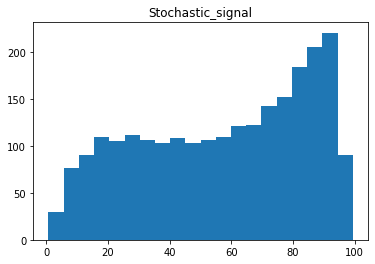

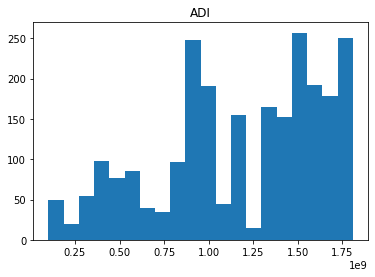

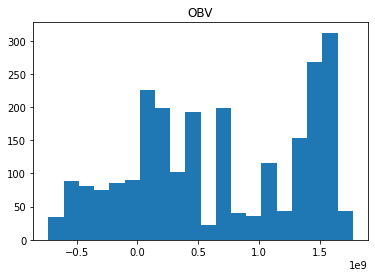

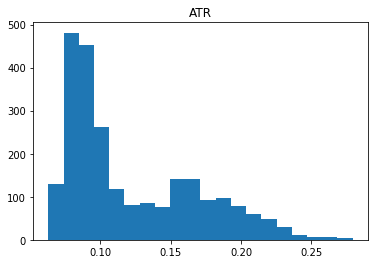

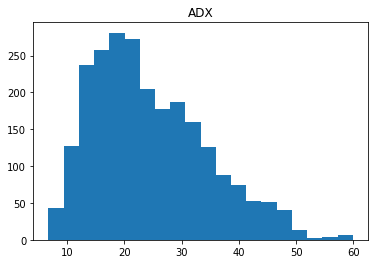

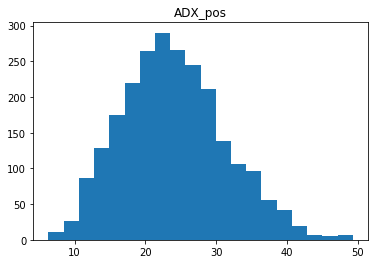

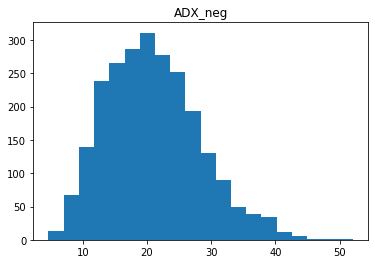

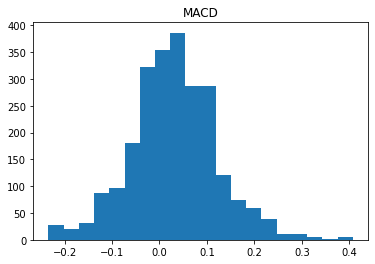

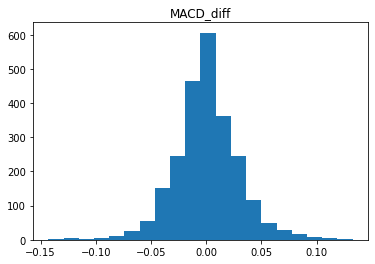

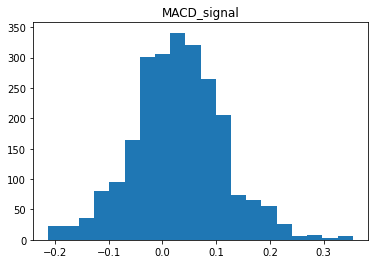

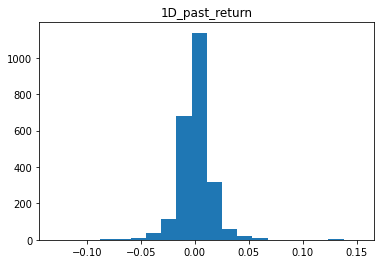

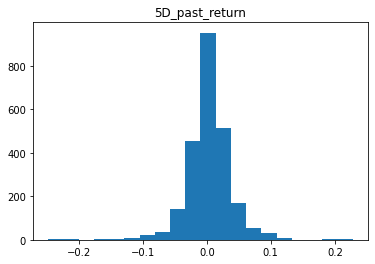

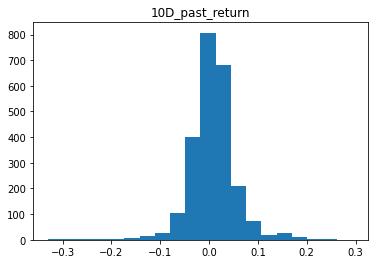

In [14]:
import matplotlib.pyplot as plt
for col in INPUT_COLS:
    plt.hist(train_df[col], bins=20)
    plt.title(col)
    plt.show()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,
          2.,   3.,   2.,   2.,   5.,   6.,   4.,  10.,  11.,  25.,  78.,
        180., 357., 581., 762., 551., 263., 125.,  68.,  31.,  13.,  24.,
         10.,   8.,   3.,  10.,   5.,   3.,   5.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

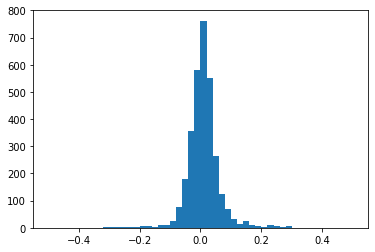

In [20]:
plt.hist(df['10TD_return'], bins=50, range=(-0.5, 0.5))

In [21]:
(df['10TD_return'] == 0).sum()/len(df)*100

0.25356576862123614

In [22]:
(train_df['10D_past_return'] > 0.8).sum()

349

In [23]:
tickers = train_df['ticker'].unique()

In [33]:
train_x_dfs = []
train_y_dfs = []
test_x_dfs = []
test_y_dfs = []

In [34]:
for ticker in tickers:
    ticker_train_df = train_df[train_df['ticker'] == ticker]
    ticker_test_df = test_df[test_df['ticker'] == ticker]
    ticker_train_x, ticker_train_y = build_arrays(ticker_train_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=30, stride=1)
    ticker_test_x, ticker_test_y = build_arrays(ticker_test_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=30, stride=1)
    train_x_dfs.append(ticker_train_x)
    train_y_dfs.append(ticker_train_y)
    test_x_dfs.append(ticker_test_x)
    test_y_dfs.append(ticker_test_y)

In [35]:
X_train = np.concatenate(train_x_dfs)
y_train = np.concatenate(train_y_dfs)
X_test = np.concatenate(test_x_dfs)
y_test = np.concatenate(test_y_dfs)

In [36]:
train_x_dfs[0].shape

(2375, 30, 15)

In [37]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [38]:
X_train.shape

(2375, 30, 15)

In [39]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [48]:
indx = list(range(len(X_train)))

In [52]:
sample_indx = random.sample(indx, 1500)

In [56]:
X_train =  X_train[[sample_indx], :][0]

In [65]:
y_train = y_train[[sample_indx]]

/Users/Kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [429]:
# from tensorflow.keras.backend import expand_dims
# X_train = expand_dims(X_train, axis=-1)
# X_test = expand_dims(X_test, axis=-1)

In [66]:
import matplotlib.pyplot as plt

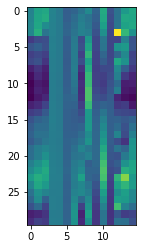

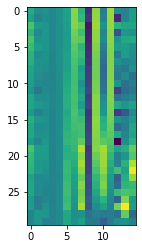

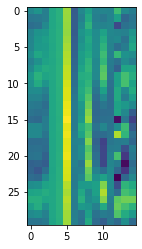

In [78]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_train[1000])

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0001)

def init_model():
    model = Sequential()
    model.add(layers.LSTM(20, return_sequences=True, input_shape=(30,15), activation='tanh'))
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model

In [72]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/500
150/150 [==============================] - 4s 29ms/step - loss: 0.6886 - accuracy: 0.5475 - val_loss: 0.6787 - val_accuracy: 0.6133
Epoch 2/500
150/150 [==============================] - 4s 24ms/step - loss: 0.6811 - accuracy: 0.5658 - val_loss: 0.6697 - val_accuracy: 0.6467
Epoch 3/500
150/150 [==============================] - 4s 25ms/step - loss: 0.6737 - accuracy: 0.5967 - val_loss: 0.6630 - val_accuracy: 0.6333
Epoch 4/500
150/150 [==============================] - 4s 24ms/step - loss: 0.6715 - accuracy: 0.6033 - val_loss: 0.6572 - val_accuracy: 0.6300
Epoch 5/500
150/150 [==============================] - 4s 26ms/step - loss: 0.6680 - accuracy: 0.6025 - val_loss: 0.6519 - val_accuracy: 0.6400
Epoch 6/500
150/150 [==============================] - 4s 24ms/step - loss: 0.6631 - accuracy: 0.6100 - val_loss: 0.6484 - val_accuracy: 0.6400
Epoch 7/500
150/150 [==============================] - 4s 24ms/step - loss: 0.6566 - accuracy: 0.6025 - val_loss: 0.6440 - val_accuracy:

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_pred.shape

(722, 1)

In [75]:
y_test.sum()/len(y_test)

0.6080332409972299

In [76]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 11ms/step - loss: 0.8989 - accuracy: 0.4418


[0.8988938331604004, 0.44182825088500977]

In [77]:
for i in range(0, len(y_pred), 10):
    print(f'Predicted {y_pred[i][0] >= 0.5}, test {y_test[i]}')

Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted True, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted True, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 0.0
Predicted False, test 1.0
Predicted False, test 1.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted False, test 0.0
Predicted True, test 0.0
Predicted False, test 0.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted False, 

In [331]:
def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(30, 4, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [332]:
model_2 = initialize_model_2()

model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_38/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_39/Relu)' with input shapes: [?,7,1,128].

In [278]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
            callbacks=[es]
         )

Epoch 1/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 2/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6922 - val_accuracy: 0.5267
Epoch 3/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 4/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6927 - val_accuracy: 0.5267
Epoch 5/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.4733
Epoch 6/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6926 - val_accuracy: 0.5267
Epoch 7/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6926 - val_ac

In [415]:
y_test.sum()/y_test.shape[0]

0.593103448275862

In [18]:
y_pred = model.predict(X_test)